In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [2]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

In [3]:
df = pd.read_csv('data/processed_data/covid-19-state-level.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,date,state,fips,cases,deaths
0,3.0,2.0,13.0,3.0,-1.0,0.0,2020-02-15,Arizona,4,1,0
1,1.0,1.0,19.0,1.0,-1.0,0.0,2020-02-15,California,6,7,0
2,4.0,3.0,10.0,3.0,3.0,-1.0,2020-02-15,Illinois,17,2,0
3,2.0,-4.0,0.0,3.0,-2.0,0.0,2020-02-15,Massachusetts,25,1,0
4,3.0,3.0,12.0,3.0,1.0,-1.0,2020-02-15,Texas,48,2,0


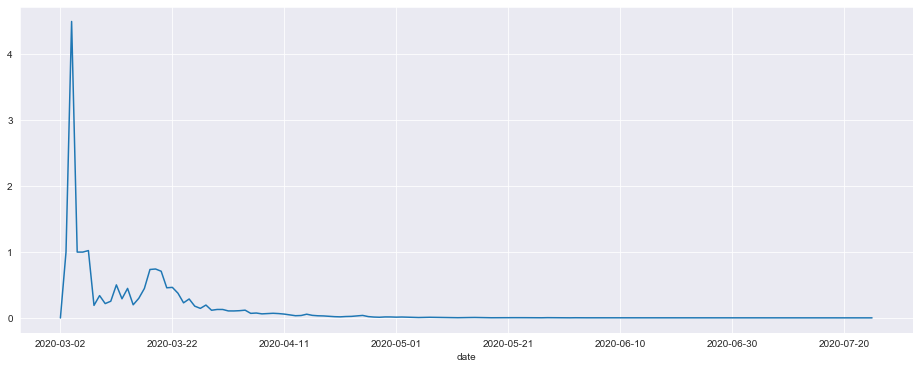

In [5]:
cases_pct_change = df[df.state == 'New York'].set_index('date')['cases'].pct_change().dropna()
# Scale by 100 to get percentages
# cases = 100 * cases.asfreq('D')

fig, ax = plt.subplots()

ax = cases_pct_change.plot(ax=ax)

In [6]:
# contrived dataset
data = df[df.state == 'New York']['cases'].reset_index(drop=True)

# fit model
auto_reg = AutoReg(data, lags=3)
model = auto_reg.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  cases   No. Observations:                  147
Model:                     AutoReg(3)   Log Likelihood               -1197.866
Method:               Conditional MLE   S.D. of innovations            991.854
Date:                Thu, 03 Dec 2020   AIC                             13.869
Time:                        22:01:34   BIC                             13.972
Sample:                             3   HQIC                            13.910
                                  147                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    610.1995    220.998      2.761      0.006     177.051    1043.348
cases.L1       1.8001      0.083     21.808      0.000       1.638       1.962
cases.L2      -0.6755      0.161     -4.192      0.000      -0.991      -0.360
cases.L3      -0.1260      0.081     -1.553      0.120      -0.285       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0335           -0.0158j            1.0336           -0.0024
AR.2            1.0335           +0.0158j            1.0336            0.0024
AR.3           -7.4271           -0.0000j            7.4271           -0.5000
-----------------------------------------------------------------------------
"""

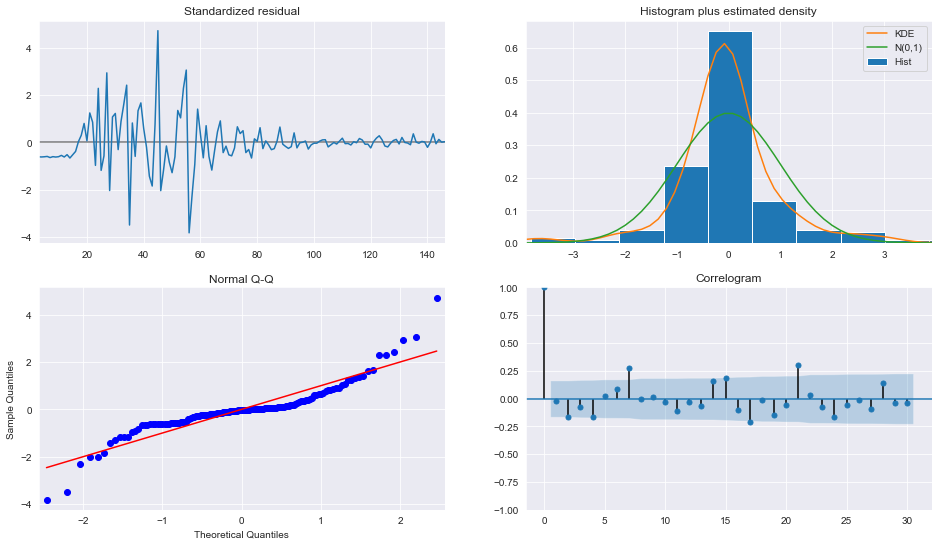

In [7]:
fig = plt.figure(figsize=(16,9))
fig = model.plot_diagnostics(fig=fig, lags=30)

In [8]:
df.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,date,state,fips,cases,deaths
0,3.0,2.0,13.0,3.0,-1.0,0.0,2020-02-15,Arizona,4,1,0
1,1.0,1.0,19.0,1.0,-1.0,0.0,2020-02-15,California,6,7,0
2,4.0,3.0,10.0,3.0,3.0,-1.0,2020-02-15,Illinois,17,2,0
3,2.0,-4.0,0.0,3.0,-2.0,0.0,2020-02-15,Massachusetts,25,1,0
4,3.0,3.0,12.0,3.0,1.0,-1.0,2020-02-15,Texas,48,2,0


In [45]:
cases = df[df['state'] == 'New York'].set_index('date')['cases']
start = cases.index[-21]
forecast_index = pd.date_range(start, freq=cases.index.freq, periods=7)
cols = ['{}-{}'.format(idx.month, idx.day) for idx in forecast_index]
forecasts = pd.DataFrame(index=forecast_index, columns=cols)

forecasts

,7-5,7-6,7-7,7-8,7-9,7-10,7-11
2020-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
forecast_index[1]

Timestamp('2020-07-03 00:00:00', freq='D')

In [39]:
model.predict(start=forecast_index[0], end=forecast_index[1])

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [28]:


for i in range(1, 24):
    fcast = model.predict(start=forecast_index[i], end=forecast_index[i+1], dynamic=True)
    forecasts.loc[fcast.index, cols[i]] = fcast
_, ax = plt.subplots(figsize=(16, 10))
ind_prod.iloc[-24:].plot(ax=ax, color="black", linestyle="--")
ax = forecasts.plot(ax=ax)

NameError: name 'ind_prod' is not defined